<a href="https://colab.research.google.com/github/kainight0/HWProj/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the DataSet**

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

**Checking the Sample and Target Sizes**

In [3]:
import numpy as np
breast_cancer.target[::100]
print(breast_cancer.data.shape)
print(breast_cancer.target.shape)


(569, 30)
(569,)


**Splitting the Data for Training and Testing, Training and Testing Set Sizes**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=11)

In [5]:
X_train.shape

(398, 30)

In [6]:
X_test.shape

(171, 30)

**Creating the Model (GaussianNB)**

In [7]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

**Training the Model**

In [8]:
gauss.fit(X_train, y_train)

GaussianNB()

**Predicting**

In [9]:
y_predict = gauss.predict(X_test)
print(y_predict)

[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


**Estimator Method score**

In [10]:
acc = gauss.score(X_test, y_test)
print(acc)

0.9415204678362573


**Confusion Matrix**

In [11]:
from sklearn.metrics import confusion_matrix
ConMat = confusion_matrix(y_test, y_predict)
print(ConMat)

[[ 52   9]
 [  1 109]]


**Classification Report**

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=breast_cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.85      0.91        61
      benign       0.92      0.99      0.96       110

    accuracy                           0.94       171
   macro avg       0.95      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



**Visualizing the Confusion Matrix**

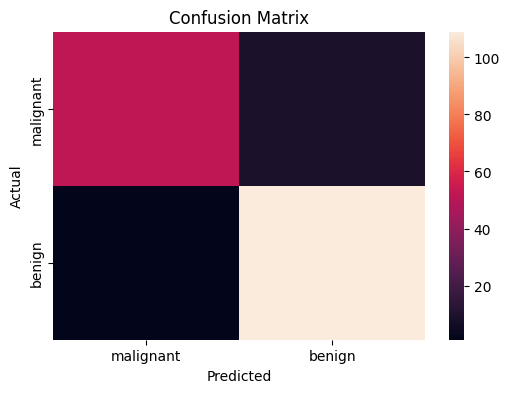

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(6,4))
sns.heatmap(ConMat, xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**K-Fold Cross-Validation**

In [14]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

scores = cross_val_score(estimator=gauss, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)


print("Cross-validation scores:")
for s in scores:
  print(round(s, 4))

print("\nMean accuracy:", round(np.mean(scores), 4))
print("Standard deviation:", round(np.std(scores), 4))

Cross-validation scores:
0.9649
0.9123
0.9474
0.8947
0.9649
0.9474
0.9649
0.8947
0.9649
0.9286

Mean accuracy: 0.9385
Standard deviation: 0.0275


**Running Multiple Models to Find the Best One**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


estimators = {
    'GaussianNB': gauss,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for name, model in estimators.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} test accuracy: {round(score, 4)}")


GaussianNB test accuracy: 0.9415
KNeighborsClassifier test accuracy: 0.9357


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression test accuracy: 0.9298
SVC test accuracy: 0.8947
